In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA


In [163]:
#adding header as indicated in the data description
col_names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
          'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cyclinders',
          'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg',
          'highway-mpg','price']

#import data
data =  pd.read_csv('/content/drive/MyDrive/imports-85.data', sep=",", header=None, names=col_names)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [164]:
#the data description says there are some '?' symbols in the data set
#, which indicates there are some missing values in it.

#Before we jump into this dataset deeply,
#Let's look at general information regarding the dataset
data.info()

#It looks like some data types of the variables are different from what I saw in the data description. 
#(such as normalized-losses, price, horsepower and so on)
#Therefore, I think it is fair to make an assumption that it is because of '?' symbols in the columns mentioned above.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cyclinders  205 non-null    object 
 16  engine-size        205 non

In [165]:
#Replacing '?' symbols to nan and counting the number of nan afterwards
data = data.replace('?', np.nan)
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cyclinders     0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [166]:
#After convering '?' symbols to nan, we see some differences in null count as below.  
#column number 1,5,18,19,21,22,25
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cyclinders  205 non-null    object 
 16  engine-size        205 non

In [167]:
#we need to convert each mistyped columns to float
# Convert the object columns to float columns
    
data["bore"] = data["bore"].astype(np.float64)
data["stroke"] = data["stroke"].astype(np.float64)
data["horsepower"] = data["horsepower"].astype(np.float64)
data["peak-rpm"] = data["peak-rpm"].astype(np.float64)
data["normalized-losses"] = data["normalized-losses"].astype(np.float64)
data["price"] = data["price"].astype(np.float64)

In [168]:
#Now we can see that the columns have been successfully converted to float
#(normalized-losses, bore, stroke, horsepower, peak-rpm  and price)
data.info()

#And let's see if only categorical variables remained object
data.select_dtypes(include = 'object').head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cyclinders  205 non-null    object 
 16  engine-size        205 non

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cyclinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [169]:
data['num-of-doors'].unique()
data['num-of-cyclinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [170]:
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('two','2')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('three','3')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('four','4')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('five','5')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('six','6')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('eight','8')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('twelve','12')
data['num-of-cyclinders']=data['num-of-cyclinders'].astype('int64')

In [171]:
#missing value imputation
#Instead of imputing simply by mode, I would like to look at each variable first,
#so that I have a better idea as to how to impute

#nan for the column, 'num-of-doors'
data[data['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,4,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,4,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


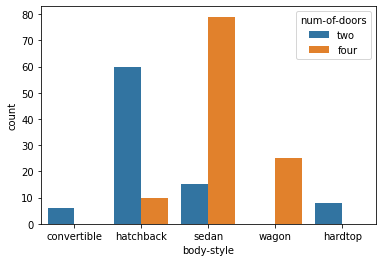

In [172]:
#Since the body-style of the two cars is sedan, 
#I think I can impute num-of-doors as four, as seen from the graph below
sns.countplot(data=data, x='body-style', hue='num-of-doors')
data['num-of-doors'].fillna('four', inplace = True)

data['num-of-doors']=data['num-of-doors'].str.replace('two','2')
data['num-of-doors']=data['num-of-doors'].str.replace('four','4')
data['num-of-doors']=data['num-of-doors'].astype('int64')

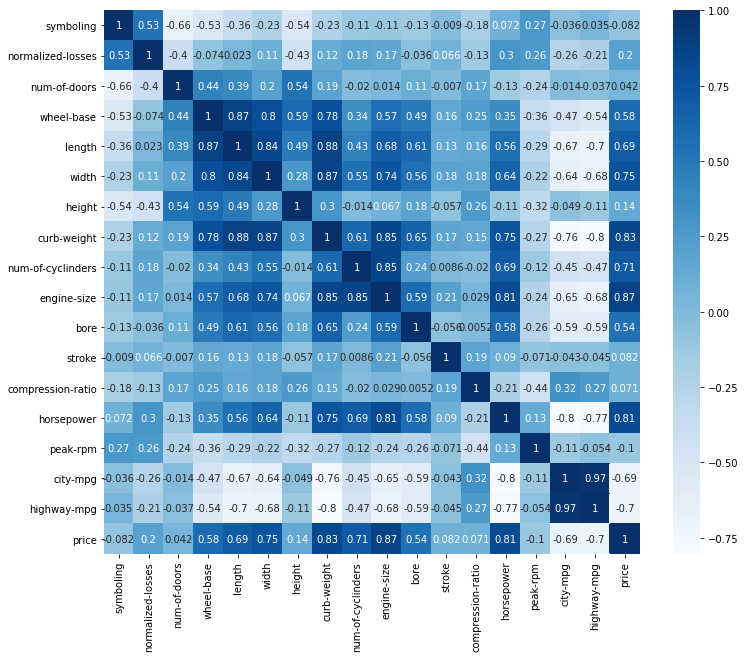

In [173]:
#for other missing values that are supposed to be numeric
#I can use correlation plot, so that I can impute them accordingly.
plt.figure(figsize=(12,10))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.show() 

In [174]:
#bore
data[data['bore'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


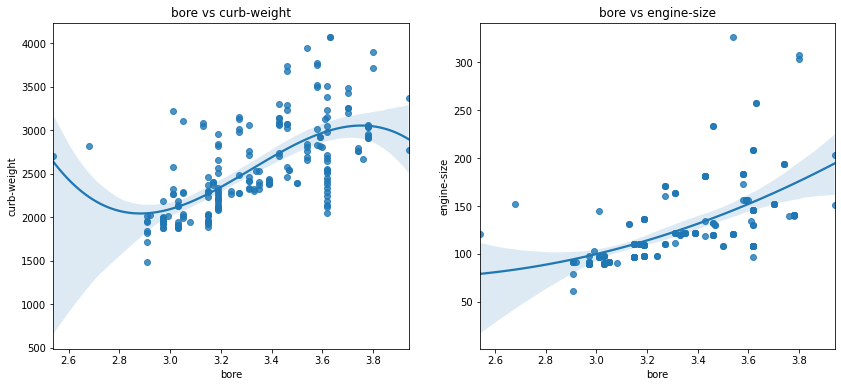

In [175]:
#since bore is correlated to curb-weight and engine-size, (top two)
#I should look into the correlations
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.regplot(data=data, x='bore',y='curb-weight', order = 3)
plt.title('bore vs curb-weight')
plt.subplot(1,2,2)
sns.regplot(data=data, x='bore',y='engine-size', order = 2)
plt.title('bore vs engine-size');
#it looks like the second graph shows a better correlation to interpret


In [176]:
#By looking at the plots above, it looks like
#for engine-size around 70 and 80, bore is around 2.9
data[data['engine-size'].between(70,80)]['bore'].mean()

2.91

In [177]:
data['bore'].fillna(2.9, inplace = True)

In [178]:
data[data['stroke'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.9,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.9,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,2.9,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,2.9,NaN,9.4,135.0,6000.0,16,23,15645.0


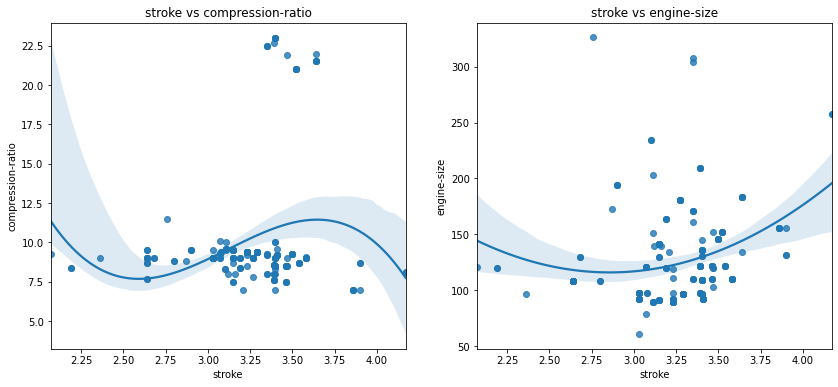

In [179]:
#since stroke is correlated to compression-ratio and engine-size, (top two)
#I should look into the correlations
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.regplot(data=data, x='stroke',y='compression-ratio', order = 3)
plt.title('stroke vs compression-ratio')
plt.subplot(1,2,2)
sns.regplot(data=data, x='stroke',y='engine-size', order = 2)
plt.title('stroke vs engine-size');
#it looks like the second graph shows a better correlation to interpret


In [180]:
data[data['engine-size'].between(70,80)]['stroke'].mean()

3.07

In [181]:
#By looking at the plots above, it looks like
#for engine-size around 70 and 80, stroke is around 3.0
data['stroke'].fillna(3, inplace = True)

In [182]:
data[data['horsepower'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,4,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


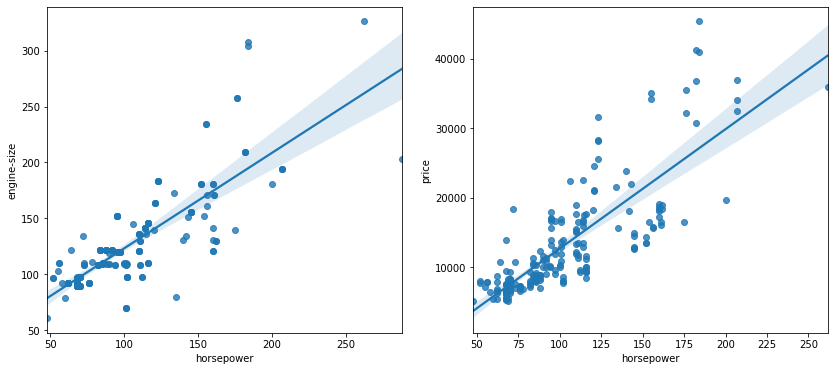

In [183]:
#since horsepower is highly correlated to price and engine-size,
#I should look into the correlations
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(data=data, x='horsepower',y='engine-size')
plt.subplot(1,2,2)
sns.regplot(data=data, x='horsepower',y='price');

In [24]:
#it seems to me that
#for engine-size 132, horsepower is around 132
#for price around 9295~9895, horsepower is around 100 as below

In [184]:
data[data['engine-size'].between(130,134)]['horsepower'].mean()

132.5

In [185]:
data[data['price'].between(9295,9895)]['horsepower'].mean()

101.0

In [186]:
#since both variable(engine-size, price) have correlations to horsepower
#I would like to impute the value '116.5' into the missing data since '116' is in the middle of 132 and 101
data['horsepower'].fillna(116.5, inplace = True)


In [187]:
#Peak RPM
#Based on the plot above, it seems like this factor is somehow correlated to compression-ratio or wheel-base
data[data['peak-rpm'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,4,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.9,8.7,116.5,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.9,8.7,116.5,NaN,23,31,9895.0


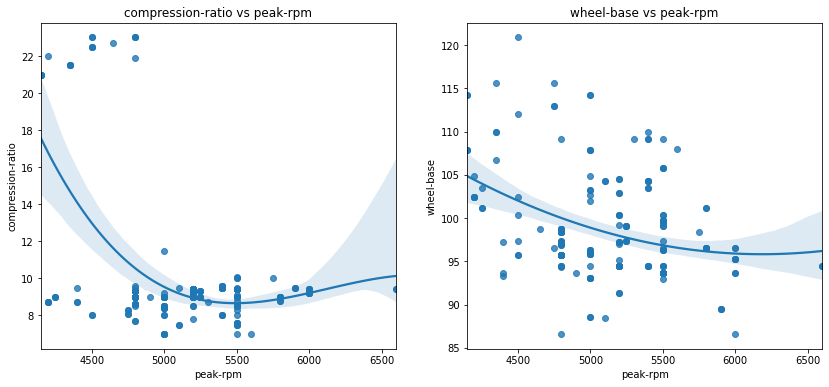

In [188]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.regplot(data=data, x='peak-rpm',y='compression-ratio', order = 3)
plt.title('compression-ratio vs peak-rpm')
plt.subplot(1,2,2)
sns.regplot(data=data, x='peak-rpm',y='wheel-base', order = 2)
plt.title('wheel-base vs peak-rpm');

In [189]:
data[data['compression-ratio'].between(8.5,8.9)]['peak-rpm'].mean()

5006.896551724138

In [190]:
data[data['wheel-base'].between(95,97)]['peak-rpm'].mean()

5176.666666666667

In [191]:
#since both variable(compression-ratio, wheel-base) have correlations to horsepower
#I would like to impute the value '5091' into the missing data since '5091' is in the middle of 5006 and 5176
data['peak-rpm'].fillna(5091, inplace = True)

In [192]:
# Encoding the categorical features
    
categorical_columns = ['make','fuel-type','aspiration', 'body-style', 'drive-wheels',
                       'engine-location', 'engine-type', 'fuel-system'] 
    
for column in categorical_columns:
  dummies = pd.get_dummies(data[column], prefix=column)
  data = pd.concat([data, dummies], axis=1)
  data = data.drop(column, axis=1)

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       164 non-null    float64
 2   num-of-doors            205 non-null    int64  
 3   wheel-base              205 non-null    float64
 4   length                  205 non-null    float64
 5   width                   205 non-null    float64
 6   height                  205 non-null    float64
 7   curb-weight             205 non-null    int64  
 8   num-of-cyclinders       205 non-null    int64  
 9   engine-size             205 non-null    int64  
 10  bore                    205 non-null    float64
 11  stroke                  205 non-null    float64
 12  compression-ratio       205 non-null    float64
 13  horsepower              205 non-null    float64
 14  peak-rpm                205 non-null    fl

In [194]:
#skipping data sample with missing values in the target
data = data[data.price.notna()]

In [195]:
#now we have only one variable with missing values, which is normalized-losses
#since there are more than 40 missing values in the variable, and that is around one fifth of the dataset
#I think it is a better idea to impute the values with a simple linear regression model

train=data[data['normalized-losses'].notna()]
train_x = train.drop('normalized-losses',1)
train_y = train['normalized-losses']
test=data[data['normalized-losses'].isna()]
test_x = test.drop('normalized-losses',1)
test_y = test['normalized-losses']

In [196]:

lm = LinearRegression().fit(train_x,train_y)


In [197]:
data.loc[data['normalized-losses'].isna(),'normalized-losses'] = lm.predict(test_x)

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               201 non-null    int64  
 1   normalized-losses       201 non-null    float64
 2   num-of-doors            201 non-null    int64  
 3   wheel-base              201 non-null    float64
 4   length                  201 non-null    float64
 5   width                   201 non-null    float64
 6   height                  201 non-null    float64
 7   curb-weight             201 non-null    int64  
 8   num-of-cyclinders       201 non-null    int64  
 9   engine-size             201 non-null    int64  
 10  bore                    201 non-null    float64
 11  stroke                  201 non-null    float64
 12  compression-ratio       201 non-null    float64
 13  horsepower              201 non-null    float64
 14  peak-rpm                201 non-null    fl

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
def vif_examine(df):
  # the independent variables set 
  X = df.select_dtypes(include = ["float64","int64"])
  
  # VIF dataframe 
  vif_data = pd.DataFrame() 
  vif_data["feature"] = X.columns 
  
  # calculating VIF for each feature 
  vif_data["VIF"] = [vif(X.values, i) for i in range(len(X.columns))] 
  print(vif_data)

In [200]:
vif_examine(data)

              feature          VIF
0           symboling     4.719695
1   normalized-losses    25.207529
2        num-of-doors    26.313133
3          wheel-base  2549.153666
4              length  2117.789614
5               width  3604.125447
6              height  1135.494712
7         curb-weight   439.874795
8   num-of-cyclinders   184.933162
9         engine-size   337.109695
10               bore   507.631092
11             stroke   202.672236
12  compression-ratio    17.596885
13         horsepower    84.171843
14           peak-rpm   237.037666
15           city-mpg   485.372532
16        highway-mpg   562.863795
17              price    26.797665


In [201]:
data['volume'] = data['length']*data['width']*data['height']

In [202]:

data=data.drop(['length','width','height'], axis = 1)


In [212]:
#do not see any sign of outliers
data.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,curb-weight,num-of-cyclinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,volume
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,127.323168,3.144279,98.797015,2555.666667,4.363184,126.875622,3.322139,3.251791,10.164279,103.527363,5117.323383,25.179104,30.686567,13207.129353,0.014925,0.029851,0.039801,0.014925,0.044776,0.064677,0.009950,0.014925,0.084577,0.039801,0.004975,0.064677,0.089552,0.054726,0.034826,0.019900,0.009950,0.029851,0.059701,0.159204,0.059701,0.054726,0.099502,0.900498,0.820896,0.179104,0.029851,0.039801,0.338308,0.467662,0.124378,0.039801,0.587065,0.373134,0.985075,0.014925,0.059701,0.0,0.059701,0.721393,0.074627,0.064677,0.019900,0.054726,0.318408,0.014925,0.099502,0.004975,0.457711,0.044776,0.004975,619579.968378
std,1.254802,37.026592,0.992008,6.066366,517.296727,1.059452,41.546834,0.274771,0.318088,4.004965,37.388340,478.120497,6.423220,6.815150,7947.066342,0.121557,0.170600,0.195979,0.121557,0.207328,0.246568,0.099501,0.121557,0.278946,0.195979,0.070535,0.246568,0.286252,0.228013,0.183796,0.140007,0.099501,0.170600,0.237525,0.366780,0.237525,0.228013,0.300083,0.300083,0.384397,0.384397,0.170600,0.195979,0.474315,0.500199,0.330836,0.195979,0.493591,0.484845,0.121557,0.121557,0.237525,0.0,0.237525,0.449433,0.263444,0.246568,0.140007,0.228013,0.467022,0.121557,0.300083,0.070535,0.499452,0.207328,0.070535,79564.106791
min,-2.000000,65.000000,2.000000,86.600000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,452643.156000
25%,0.000000,95.000000,2.000000,94.500000,2169.000000,4.000000,98.000000,3.150000,3.100000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [204]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = data.select_dtypes(include = ["float64","int64"])
X = X.drop(columns = "symboling")
std_trs = sc.fit_transform(X)

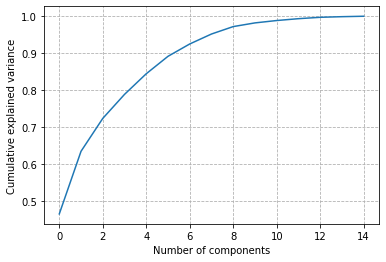

In [205]:
from sklearn.decomposition import PCA
pca1 = PCA().fit(std_trs)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True, linestyle = "--")

In [206]:
pca = PCA(n_components = 8)
x_pca = pca.fit_transform(std_trs)

In [207]:
df_pca = pd.DataFrame(x_pca)

In [210]:
data.shape

(201, 67)

In [208]:
df_obj = data.select_dtypes(include = "object")

In [209]:
new_df = pd.concat([df_obj, df_pca,  data['symboling']], axis = 1 )
new_df.head()

,0,1,2,3,4,5,6,7,symboling
0,-0.287778,-2.339774,0.056266,1.575656,-1.851433,-0.016733,0.331791,-0.452349,3.0
1,-0.151836,-2.389978,0.131886,1.596268,-1.876027,0.087551,0.319574,-0.521630,3.0
2,1.092751,-2.249526,1.998852,-0.287651,0.819729,0.993360,1.138928,1.165605,1.0
3,-0.200999,-0.317006,-0.312753,-1.328024,-0.090310,0.811309,0.441030,-0.609501,2.0
4,1.543736,-1.083000,-0.456311,-1.159463,0.448128,0.754497,0.720897,-0.221086,2.0


In [162]:
new_df = pd.get_dummies(new_df, drop_first = True)
new_df.shape

(205, 9)

In [144]:
X=data.drop('price',1)
y=data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [150]:
def model_name(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)

    explained_variance=metrics.explained_variance_score(y_test, model_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, model_pred) 
    mse=metrics.mean_squared_error(y_test, model_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, model_pred)
    r2=metrics.r2_score(y_test, model_pred)
    print('explained_variance     : ', round(explained_variance,4))    
    print('r2   : ', round(r2,4))
    print('MAE  : ', round(mean_absolute_error,4))
    print('MSE  : ', round(mse,4))
    print('RMSE : ', round(np.sqrt(mse),4))


In [151]:
model_name(LinearRegression())

explained_variance     :  0.9312
r2   :  0.9289
MAE  :  1775.6659
MSE  :  8697220.4642
RMSE :  2949.105


In [152]:
model_name(RandomForestRegressor())

explained_variance     :  0.9323
r2   :  0.9257
MAE  :  1920.9089
MSE  :  9086517.2442
RMSE :  3014.3851


In [106]:

model_name(RandomForestRegressor())

explained_variance     :  0.9366
mean_squared_log_error :  0.0162
r2   :  0.9298
MAE  :  1831.9853
MSE  :  8583685.3239
RMSE :  2929.7927


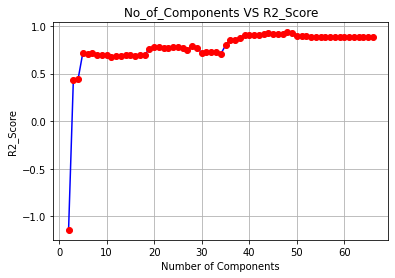

In [109]:
i_value=[]
r2_value=[]
for i in range(2,np.size(X,1)+1):
    
    # Breaking X and y in Training and Test Set
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    
    # Applying PCA
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    # Training And Testing the model
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    r2_value.append(r2_score(y_pred,y_test).round(4))
    i_value.append(i)
    
# Plotting the r2 Score with different number of components for PCA
plt.plot(i_value,r2_value,marker='o',mfc='red',mec='red',color='blue')
plt.xlabel('Number of Components')
plt.ylabel('R2_Score')
plt.title('No_of_Components VS R2_Score')
plt.grid(b=None)
plt.show()

In [110]:
# Applying PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
n=r2_value.index(max(r2_value))+2
pca = PCA(n_components = n)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In [95]:
print(n)

48
